## Import

In [ ]:
import numpy as np
from numpy.typing import NDArray
import time
import matplotlib.pyplot as plt
import random
np.set_printoptions(precision = 3, formatter = {"float": '{:0.3f}'. format})

## def pla()

In [ ]:
def pla(X: NDArray[np.float64], y: list[int], weight: list[float], learning_rate: float, should_shuffle: bool, iterations: int):
    updated_times = 0
    epochs = 0
    inner_for = 0
    training_error = 100 # set training error high so that pocket part of algorithm will update properly on first iteration
    optimal_weight = weight[:] # for pocket to keep best weights
    indicies: list[int] = list(range(len(X))) # store indices that we can shuffle

    if should_shuffle == True:
        random.shuffle(indicies)

    for g in range(iterations):
        updated = False
        for i in indicies:
            # calc net input as dot product of vector xj and w
            z = np.dot(X[i], weight)
            if y[i] * z <= 0:
                updated_times += 1
                updated = True
                # perform weight update
                for j in range(3):
                    weight[j] += y[i] * learning_rate * X[i][j]

                """Pocket portion of algorihgtm. Determine training error after update"""
                w = sum(y[k] * np.dot(X[k], weight) <= 0 for k in range(len(X)))

                if (w < training_error):
                    training_error = w
                    epochs = g
                    inner_for = i
                    optimal_weight = weight[:]

            if training_error == 0:
                    break

        if not updated:
            break

    print(f"the lowest error rate found in the training set is {training_error} or {(training_error / 30) * 100} %")
    print(f"this solution was found on the {epochs} epoch")
    print(f"and the {inner_for}'th iteration of the inner for loop")
    print(f"The weight vector was updated {updated_times} times")
    print(f"The weight vector was updated to {optimal_weight}")
    return optimal_weight

# Non-linearlly Separable Data


## def visualize_data()

In [ ]:
def visualize_data(best_weights: list[float], X_train: NDArray[np.float64], X_test: NDArray[np.float64], y_train, y_test, weight_input, learning_rate, shuffle):
    color_dict = {1: 'green', -1: 'red'}
    errors: list[int] = []

    # Generate decision boundary line
    x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    x2_vals = - (best_weights[0] + best_weights[1] * x_vals) / best_weights[2]


    for h in range(30):
        if y_train[h] * (best_weights[0] + best_weights[1] * X_train[h][0] + best_weights[2] * X_train[h][1]) <= 0:
            errors.append(X_train[h])

    print(f"The decision boundary misclassifies the following points of the training set {errors}")

    """Plot training data with decision boundary"""
    plt.title(f"training set with decision boundary, learning rate {learning_rate}, original weights {best_weights}, shuffle = {shuffle}")
    plt.scatter(X_train[:, 0], X_train[:, 1], c=[color_dict[c] for c in y_train])
    plt.plot(x_vals, x2_vals, 'g--', label="Decision Boundary")
    plt.show()

    test_error = 0
    errors = []
    for h in range(0, 10):
        if y_test[h] * (best_weights[0] + best_weights[1] * X_test[h][0] + best_weights[2] * X_test[h][1]) <= 0:
            test_error += 1
            errors.append(X_test[h])

    print(f"The weight vector misclassifies the following points on the test set {errors}")
    print(f"the error rate on the test set is {test_error} or {(test_error / 10) * 100} %")

    """plot the test data with the decision boundary"""
    plt.title(f"test set with decision boundary, learning rate {learning_rate}, orginal weights {best_weights}, shuffle = {shuffle}")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=[color_dict[c] for c in y_test])
    plt.plot(x_vals, x2_vals, color='red')
    plt.show()

## Create data

In [ ]:
np.random.seed(45)
X_train = np.random.normal(10, 1, size=(30,2))
X_test = np.random.normal(10, 1, size=(10,2))

y_train = [1] * 15 +[-1] * 15
y_test = [1] * 5 + [-1] * 5

"""add the dummy variable to each element of x sub n"""
ones_column_vector = np.ones((30,1))
X_train_3D = np.concatenate((ones_column_vector, X_train), axis = 1)

print("training data")
print(X_train)
print()
print("test data")
print(X_test)
print()
print("")
print(X_train_3D[:5])

training data
[[10.026 10.260]
 [9.605 9.796]
 [8.728 7.403]
 [10.290 9.127]
 [10.394 10.935]
 [9.984 10.260]
 [8.527 10.802]
 [8.249 9.505]
 [8.991 10.025]
 [9.878 8.453]
 [9.393 8.606]
 [9.372 10.333]
 [8.459 11.670]
 [9.500 10.673]
 [12.248 8.346]
 [9.526 9.698]
 [9.069 11.111]
 [9.810 11.278]
 [9.446 10.354]
 [9.560 9.576]
 [10.228 10.579]
 [9.146 9.159]
 [9.344 9.853]
 [8.588 9.729]
 [11.129 8.660]
 [9.751 11.763]
 [9.408 9.092]
 [10.272 9.995]
 [10.854 8.410]
 [10.056 10.106]]

test data
[[9.909 9.286]
 [10.204 11.203]
 [10.084 10.164]
 [10.374 9.773]
 [9.329 10.314]
 [11.484 10.652]
 [9.767 11.185]
 [10.921 11.217]
 [8.117 10.221]
 [11.817 11.743]]


[[1.000 10.026 10.260]
 [1.000 9.605 9.796]
 [1.000 8.728 7.403]
 [1.000 10.290 9.127]
 [1.000 10.394 10.935]]


## Visualize data pre-boundary

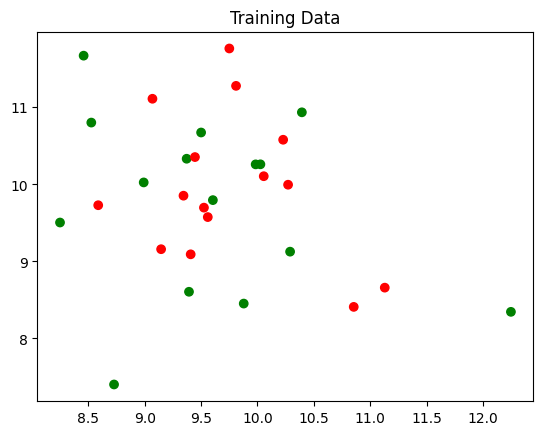

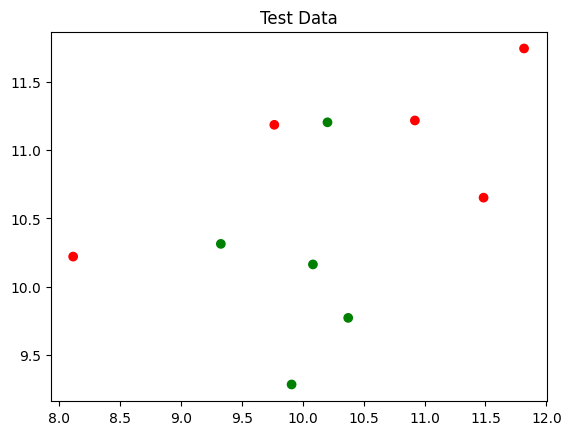

In [ ]:
"""visualize the raw data with green = +1 and red = -1"""
color_dict = {1 : 'green', -1 : 'red'}
plt.scatter(X_train[:, 0], X_train[:, 1], c=[color_dict[c] for c in y_train])
plt.title("Training Data")
plt.show()

"""Visualize test data"""
color_dict = {1 : 'green', -1 : 'red'}
plt.scatter(X_test[:, 0], X_test[:, 1], c=[color_dict[c] for c in y_test])
plt.title("Test Data")
plt.show()

### PLA Run -> W = 0, learning_rate = 0.1, shuffle = True, iterations = 500


weight vector initialized to [0.0, 0.0, 0.0], learning_rate = 0.1, shuffle = True
the lowest error rate found in the training set is 12 or 40.0 %
this solution was found on the 159 epoch
and the 19'th iteration of the inner for loop
The weight vector was updated 7066 times
 
The decision boundary misclassifies the following points of the training set [array([8.728, 7.403]), array([10.290, 9.127]), array([9.878, 8.453]), array([9.393, 8.606]), array([12.248, 8.346]), array([9.069, 11.111]), array([9.810, 11.278]), array([9.446, 10.354]), array([10.228, 10.579]), array([9.344, 9.853]), array([8.588, 9.729]), array([9.751, 11.763])]


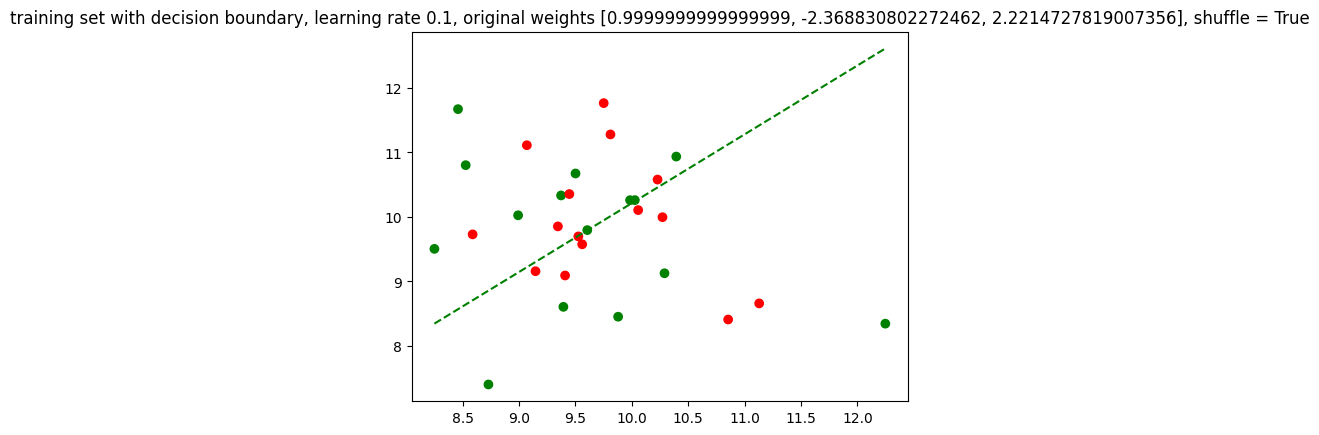

The weight vector misclassifies the following points on the test set [array([9.909, 9.286]), array([10.084, 10.164]), array([10.374, 9.773]), array([9.767, 11.185]), array([10.921, 11.217]), array([8.117, 10.221])]
the error rate on the test set is 6 or 60.0 %


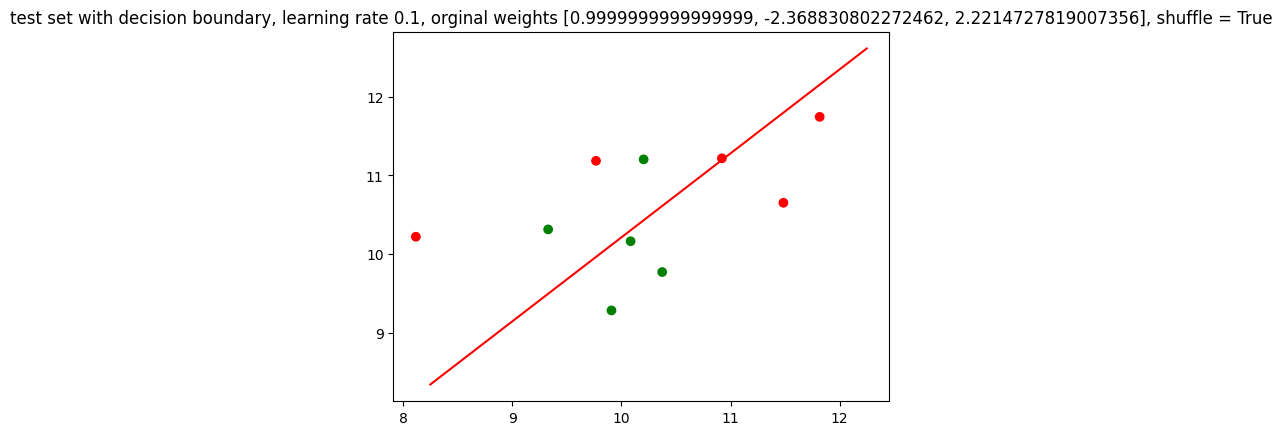

In [ ]:
"""Shuffle the order points are considered in"""
weight_input = [0.0] * 3
learning_rate = 0.1
shuffle = True
iterations = 500

print(f"weight vector initialized to {weight_input}, learning_rate = {learning_rate}, shuffle = {shuffle}")
best_weight = pla(X_train_3D, y_train, weight_input, learning_rate, shuffle, iterations)

print(" ")
visualize_data(best_weight, X_train, X_test, y_train, y_test, weight_input, learning_rate, shuffle)

### PLA Run -> W = 0, learning_rate = 0.1, shuffle = False, iterations = 500


weight vector initialized to [0.0, 0.0, 0.0], lerning rate = 0.1, shuffle = False
the lowest error rate found in the training set is 15 or 50.0 %
this solution was found on the 0 epoch
and the 0'th iteration of the inner for loop
The weight vector was updated 208 times
best weight is [0.1, 1.0026374772849562, 1.0260321701422652]
The decision boundary misclassifies the following points of the training set [array([9.526, 9.698]), array([9.069, 11.111]), array([9.810, 11.278]), array([9.446, 10.354]), array([9.560, 9.576]), array([10.228, 10.579]), array([9.146, 9.159]), array([9.344, 9.853]), array([8.588, 9.729]), array([11.129, 8.660]), array([9.751, 11.763]), array([9.408, 9.092]), array([10.272, 9.995]), array([10.854, 8.410]), array([10.056, 10.106])]


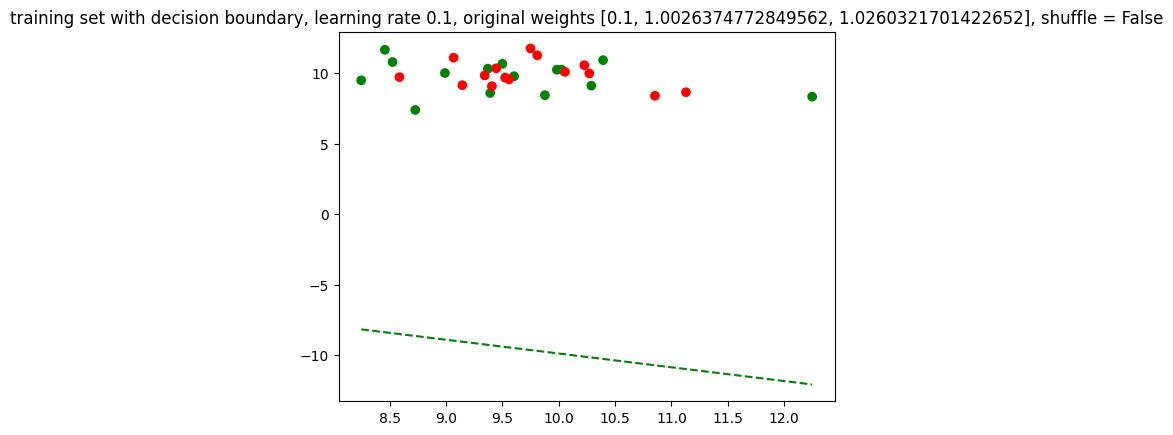

The weight vector misclassifies the following points on the test set [array([11.484, 10.652]), array([9.767, 11.185]), array([10.921, 11.217]), array([8.117, 10.221]), array([11.817, 11.743])]
the error rate on the test set is 5 or 50.0 %


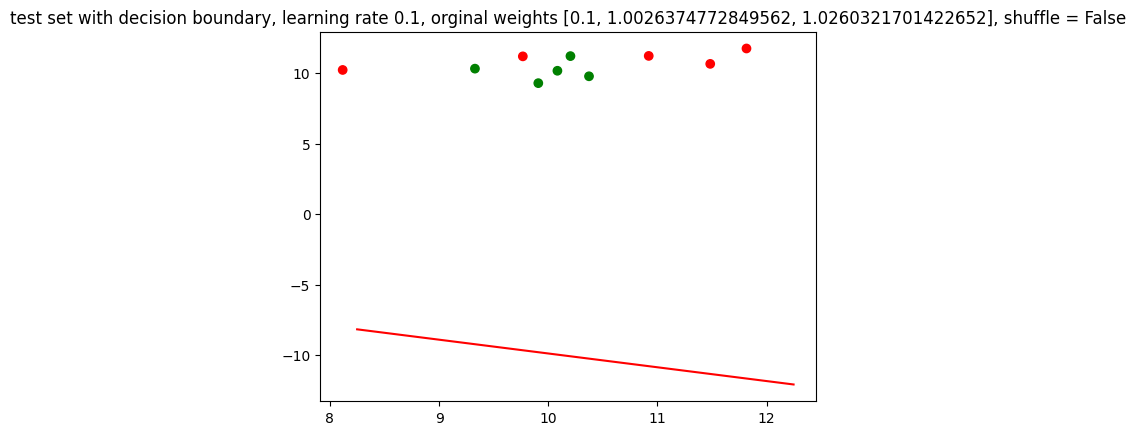

In [ ]:
weight_input = [0.0] * 3
learning_rate = 0.1
shuffle = False
iterations = 100

print(f"weight vector initialized to {weight_input}, lerning rate = {learning_rate}, shuffle = {shuffle}")
best_weight = pla(X_train_3D, y_train, weight_input, learning_rate, shuffle, iterations)

print(f"best weight is {best_weight}")
visualize_data(best_weight, X_train, X_test, y_train, y_test, weight_input, learning_rate, shuffle)

### PLA Run -> W = 1.0, learning_rate = 0.1, shuffle = False, iterations = 1000

 weight vector initialized to [1.0, 1.0, 1.0], lerning rate = 0.1, shufle = false
the lowest error rate found in the training set is 14 or 46.666666666666664 %
this solution was found on the 173 epoch
and the 15'th iteration of the inner for loop
The weight vector was updated 2260 times
best weight is [1.3877787807814457e-16, 0.1486981060623247, -0.19882648468411368]
The decision boundary misclassifies the following points of the training set [array([10.026, 10.260]), array([9.605, 9.796]), array([8.728, 7.403]), array([10.290, 9.127]), array([10.394, 10.935]), array([9.984, 10.260]), array([8.527, 10.802]), array([8.249, 9.505]), array([8.991, 10.025]), array([9.878, 8.453]), array([9.393, 8.606]), array([9.372, 10.333]), array([8.459, 11.670]), array([9.500, 10.673])]


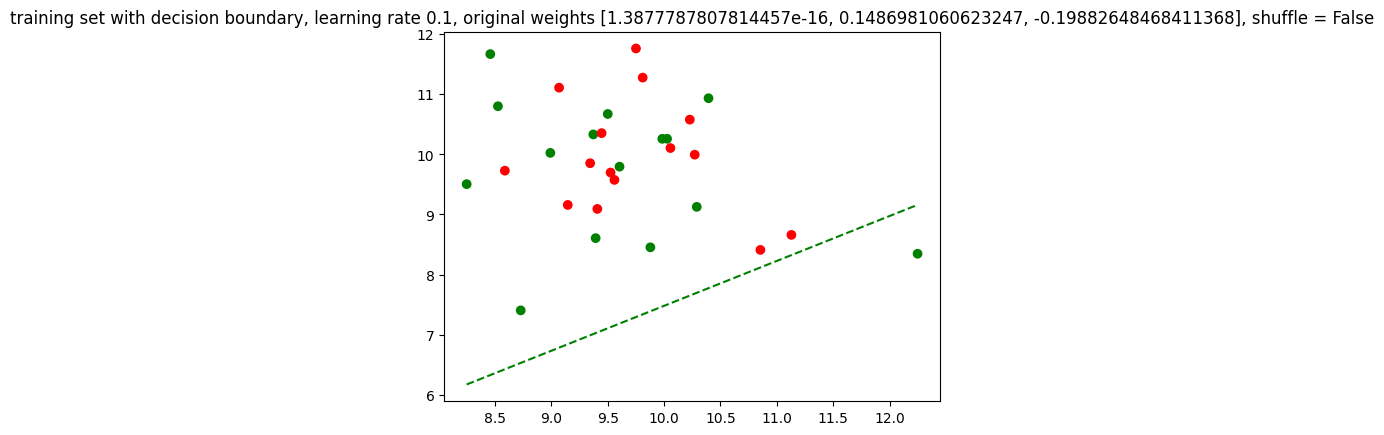

The weight vector misclassifies the following points on the test set [array([9.909, 9.286]), array([10.204, 11.203]), array([10.084, 10.164]), array([10.374, 9.773]), array([9.329, 10.314])]
the error rate on the test set is 5 or 50.0 %


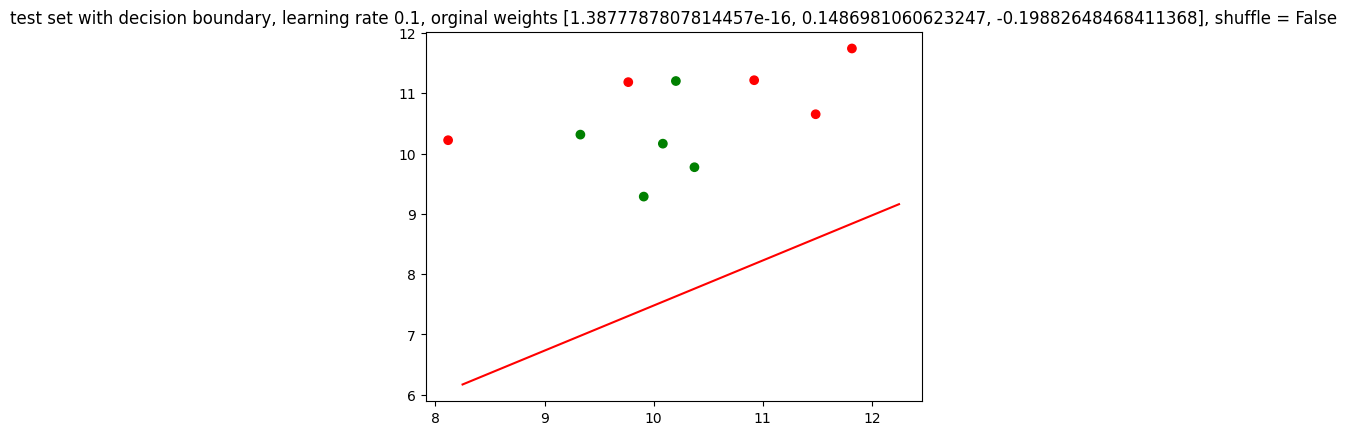

In [ ]:
weight_input = [1.0] * 3
learning_rate = 0.1
shuffle = False
iterations = 500

print(f" weight vector initialized to {weight_input}, lerning rate = {learning_rate}, shufle = false")
best_weight = pla(X_train_3D, y_train, weight_input, learning_rate, shuffle, iterations)

print(f"best weight is {best_weight}")
visualize_data(best_weight, X_train, X_test, y_train, y_test, weight_input, learning_rate, False)

 weight vector initialized to [0, 0, 0], lerning rate = 0.001, shufle = false
the lowest error rate found in the training set is 14 or 46.666666666666664 %
this solution was found on the 193 epoch
and the 15'th iteration of the inner for loop
The weight vector was updated 2321 times
best weight is [-0.010000000000000002, 0.001956994519882276, -0.0014352247811471493]
The decision boundary misclassifies the following points of the training set [array([10.026, 10.260]), array([9.605, 9.796]), array([8.728, 7.403]), array([10.290, 9.127]), array([10.394, 10.935]), array([9.984, 10.260]), array([8.527, 10.802]), array([8.249, 9.505]), array([8.991, 10.025]), array([9.878, 8.453]), array([9.393, 8.606]), array([9.372, 10.333]), array([8.459, 11.670]), array([9.500, 10.673])]


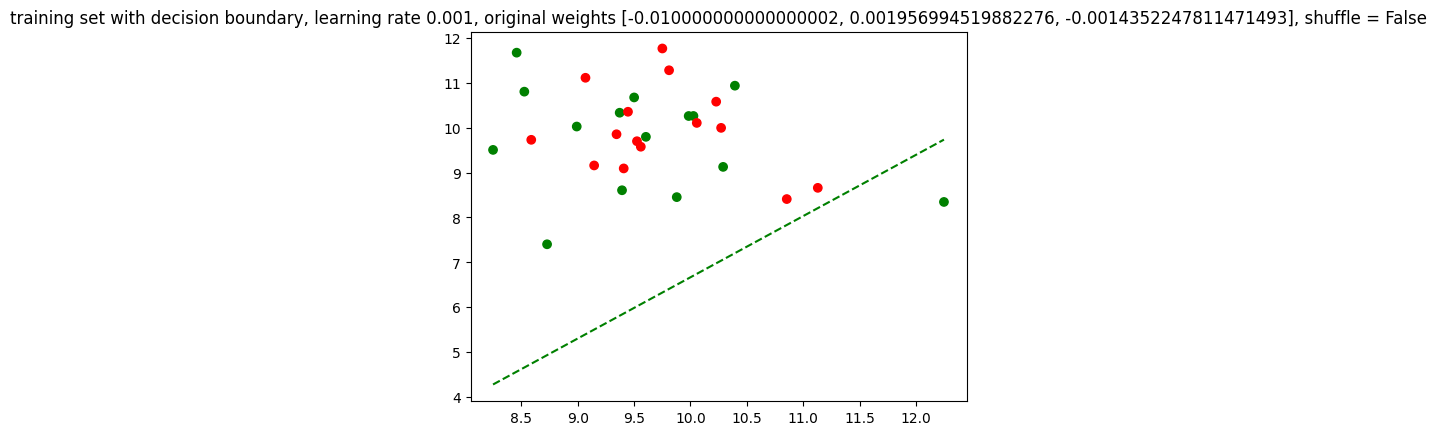

The weight vector misclassifies the following points on the test set [array([9.909, 9.286]), array([10.204, 11.203]), array([10.084, 10.164]), array([10.374, 9.773]), array([9.329, 10.314])]
the error rate on the test set is 5 or 50.0 %


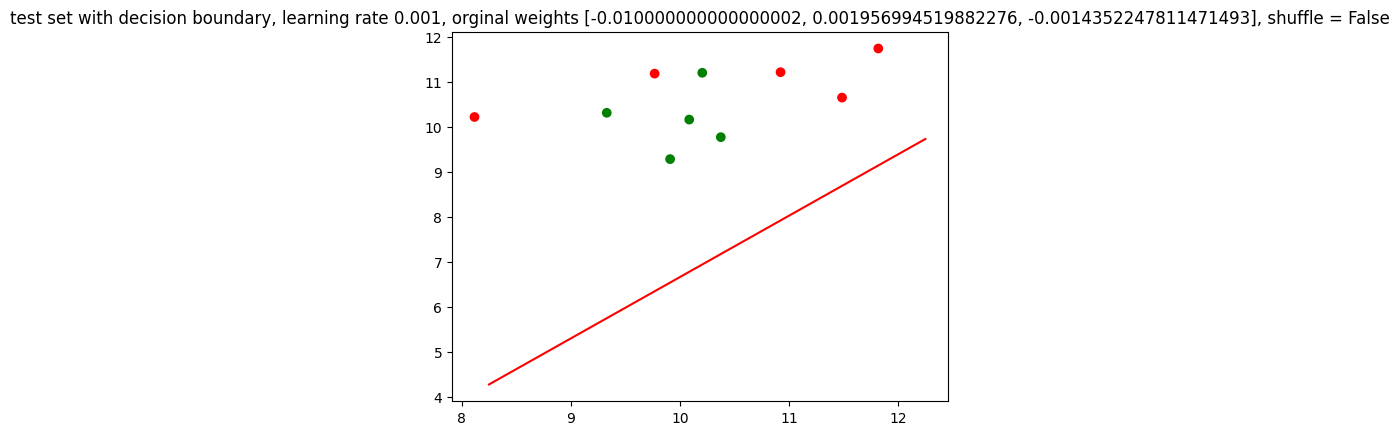

In [ ]:
weight_input = [0] * 3
learning_rate = 0.001
shuffle = False
iterations = 500

print(f" weight vector initialized to {weight_input}, lerning rate = {learning_rate}, shufle = false")
best_weight = pla(X_train_3D, y_train, weight_input, learning_rate, shuffle, iterations)

print(f"best weight is {best_weight}")
visualize_data(best_weight, X_train, X_test, y_train, y_test, weight_input, learning_rate, False)

# Linearly Separable Data

## Create data

In [ ]:
# create upper and lower split data for train
x_train_upper = np.random.normal(10, 1, size=(15,2)) + 1.5
x_train_lower = np.random.normal(10, 1, size=(15,2)) - 1.5
# combine into full datasets
X_train = np.vstack((x_train_upper, x_train_lower))
y_train = [1] * 15 +[-1] * 15
y_test = [1] * 5 + [-1] * 5

"""add the dummy variable to each element of x sub n"""
ones_column_vector = np.ones((30,1))
X_train_3D = np.concatenate((ones_column_vector, X_train), axis = 1)

print("Linearly separable training data: ")
print(X_train)
print()
print("Linearly separable test data: ")
print(X_test)
print()
print("First 5 rows of train with x0 == 1")
print(X_train_3D[:5])

Linearly separable training data: 
[[11.440 10.910]
 [10.678 11.448]
 [11.415 11.931]
 [11.303 10.839]
 [11.254 11.290]
 [10.994 10.061]
 [11.296 10.933]
 [11.151 10.470]
 [12.086 11.872]
 [9.093 12.464]
 [11.597 11.929]
 [12.097 12.230]
 [10.309 13.015]
 [10.802 11.174]
 [12.283 9.813]
 [9.916 7.871]
 [7.984 10.947]
 [6.918 6.694]
 [8.878 7.476]
 [7.542 8.299]
 [8.804 8.261]
 [9.060 7.121]
 [9.870 6.688]
 [8.632 10.260]
 [7.971 9.478]
 [7.439 7.132]
 [6.657 7.982]
 [10.127 8.823]
 [9.199 11.494]
 [8.728 8.221]]

Linearly separable test data: 
[[9.909 9.286]
 [10.204 11.203]
 [10.084 10.164]
 [10.374 9.773]
 [9.329 10.314]
 [11.484 10.652]
 [9.767 11.185]
 [10.921 11.217]
 [8.117 10.221]
 [11.817 11.743]]

First 5 rows of train with x0 == 1
[[1.000 11.440 10.910]
 [1.000 10.678 11.448]
 [1.000 11.415 11.931]
 [1.000 11.303 10.839]
 [1.000 11.254 11.290]]


## Visualize data pre-boundary

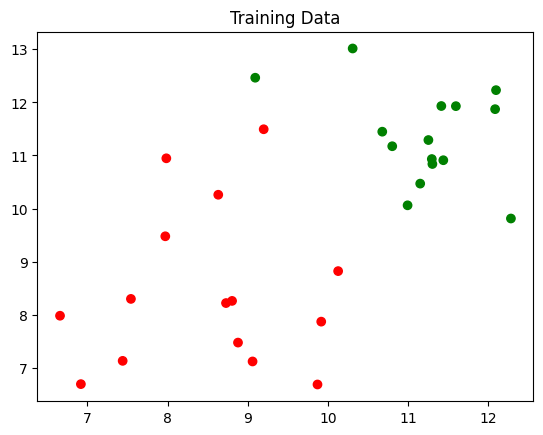

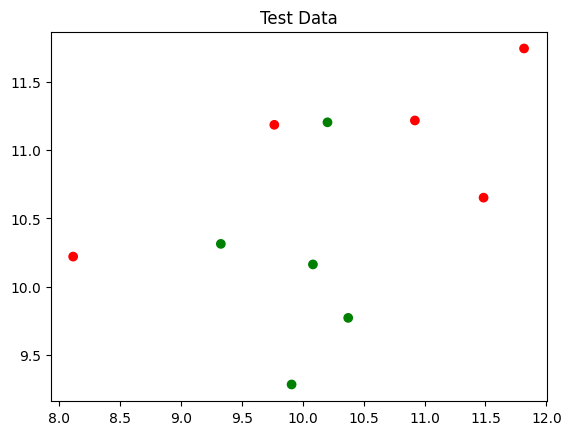

In [ ]:
"""visualize the raw data with green = +1 and red = -1"""
color_dict = {1 : 'green', -1 : 'red'}
plt.scatter(X_train[:, 0], X_train[:, 1], c=[color_dict[c] for c in y_train])
plt.title("Training Data")
plt.show()

"""Visualize test data"""
color_dict = {1 : 'green', -1 : 'red'}
plt.scatter(X_test[:, 0], X_test[:, 1], c=[color_dict[c] for c in y_test])
plt.title("Test Data")
plt.show()

## PLA Run -> W = 0, learning_rate = 0.1, shuffle = False, iterations = 5000

weight vector initialized to [0.0, 0.0, 0.0], learning_rate = 0.1, shuffle = False
the lowest error rate found in the training set is 4 or 13.333333333333334 %
this solution was found on the 343 epoch
and the 0'th iteration of the inner for loop
The weight vector was updated 1191 times
The weight vector was updated to [-8.599999999999985, -0.297206301513548, 1.262129851308257]
 
The decision boundary misclassifies the following points of the training set [array([7.984, 10.947]), array([8.632, 10.260]), array([7.971, 9.478]), array([9.199, 11.494])]


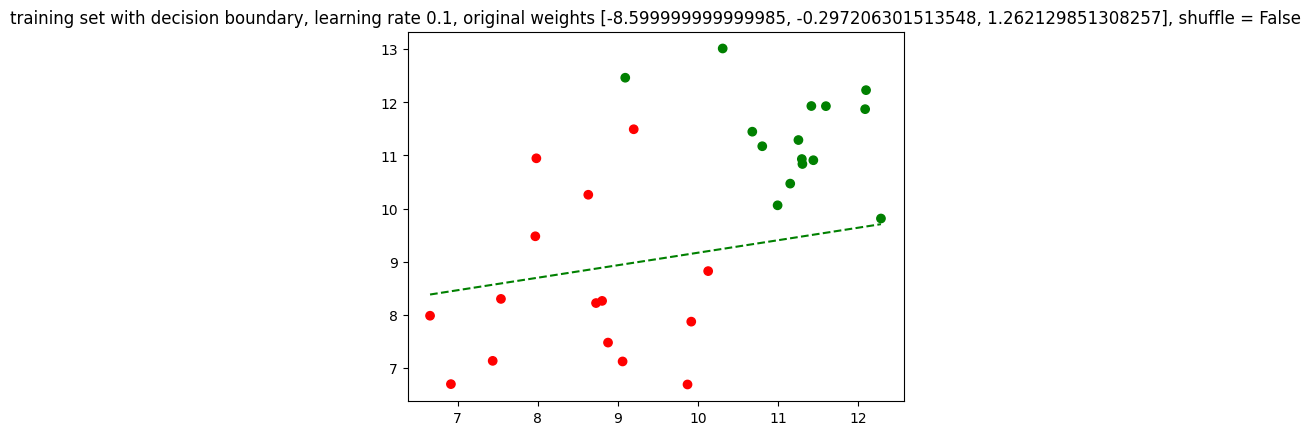

The weight vector misclassifies the following points on the test set [array([11.484, 10.652]), array([9.767, 11.185]), array([10.921, 11.217]), array([8.117, 10.221]), array([11.817, 11.743])]
the error rate on the test set is 5 or 50.0 %


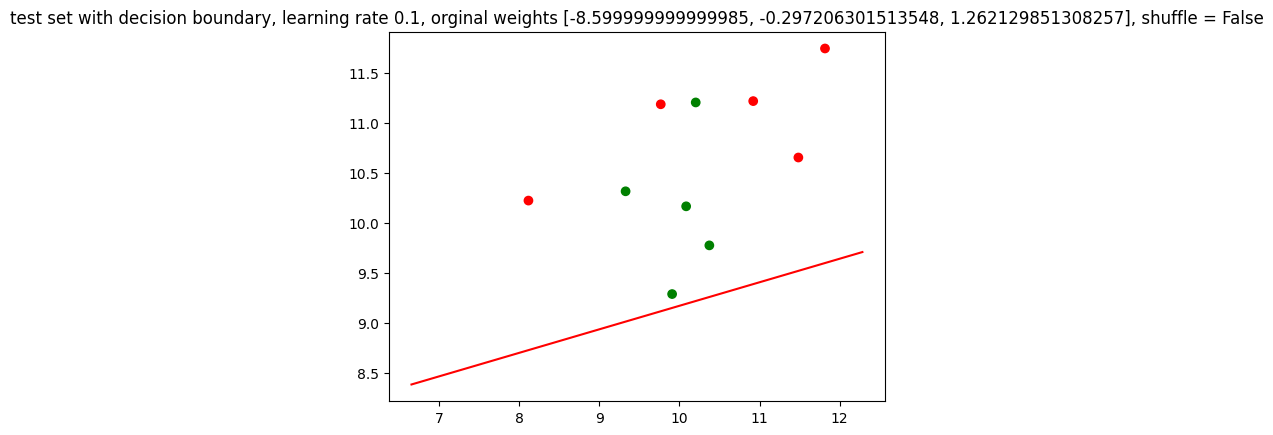

In [ ]:
"""Baseline"""
weight_input = [0.0] * 3
learning_rate = 0.1
shuffle = False
iterations = 5000

print(f"weight vector initialized to {weight_input}, learning_rate = {learning_rate}, shuffle = {shuffle}")
best_weight = pla(X_train_3D, y_train, weight_input, learning_rate, shuffle, iterations)

print(" ")
visualize_data(best_weight, X_train, X_test, y_train, y_test, weight_input, learning_rate, shuffle)

## PLA Run -> W = 1.0, learning_rate = 0.1, shuffle = False, iterations = 5000


weight vector initialized to [1.0, 1.0, 1.0], learning_rate = 0.1, shuffle = False
the lowest error rate found in the training set is 4 or 13.333333333333334 %
this solution was found on the 405 epoch
and the 0'th iteration of the inner for loop
The weight vector was updated 1210 times
The weight vector was updated to [-9.299999999999983, -0.29475763227545526, 1.3517665516445114]
 
The decision boundary misclassifies the following points of the training set [array([7.984, 10.947]), array([8.632, 10.260]), array([7.971, 9.478]), array([9.199, 11.494])]


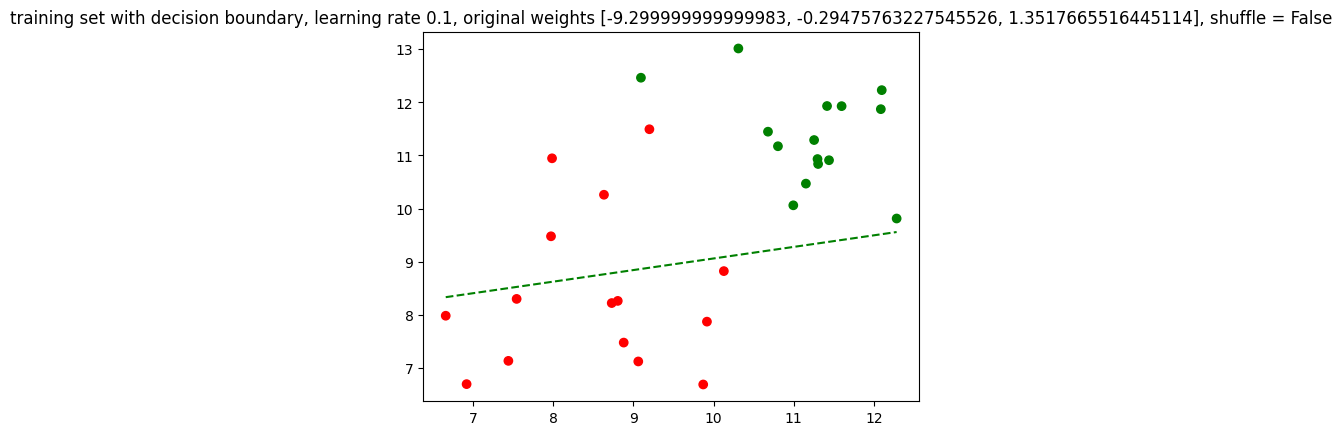

The weight vector misclassifies the following points on the test set [array([11.484, 10.652]), array([9.767, 11.185]), array([10.921, 11.217]), array([8.117, 10.221]), array([11.817, 11.743])]
the error rate on the test set is 5 or 50.0 %


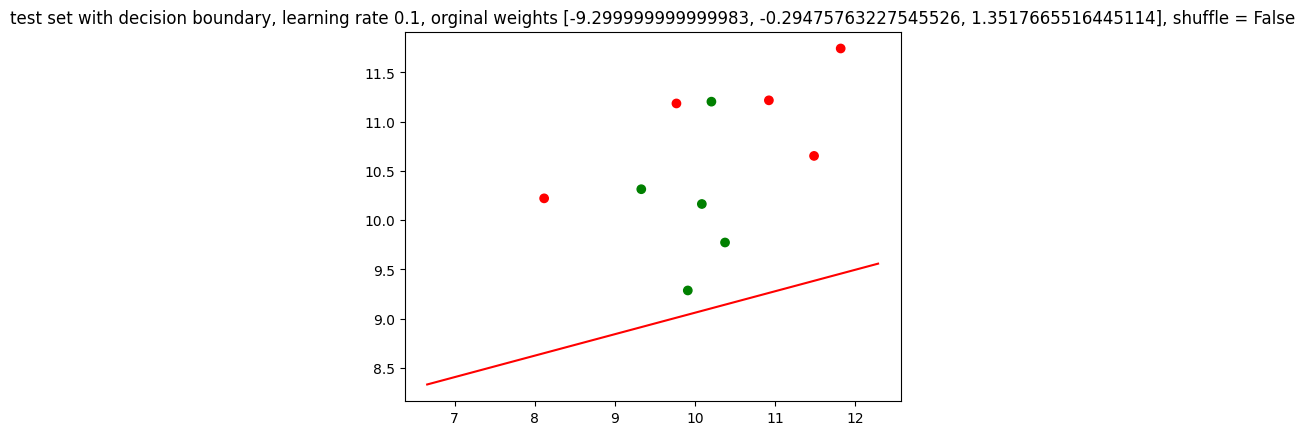

In [ ]:
"""Change the weight"""
weight_input = [1.0] * 3
learning_rate = 0.1
shuffle = False
iterations = 500

print(f"weight vector initialized to {weight_input}, learning_rate = {learning_rate}, shuffle = {shuffle}")
best_weight = pla(X_train_3D, y_train, weight_input, learning_rate, shuffle, iterations)

print(" ")
visualize_data(best_weight, X_train, X_test, y_train, y_test, weight_input, learning_rate, shuffle)

PLA Run -> W=0, learning_rate=0.001, shuffle = False, iterations = 5000

---



# PLA Run -> W=0, learning_rate=0.001, shuffle = False, iterations = 5000

weight vector initialized to [0, 0, 0], learning_rate = 0.001, shuffle = False
the lowest error rate found in the training set is 4 or 13.333333333333334 %
this solution was found on the 343 epoch
and the 0'th iteration of the inner for loop
The weight vector was updated 1191 times
The weight vector was updated to [-0.08600000000000006, -0.0029720630151351506, 0.012621298513082885]
 
The decision boundary misclassifies the following points of the training set [array([7.984, 10.947]), array([8.632, 10.260]), array([7.971, 9.478]), array([9.199, 11.494])]


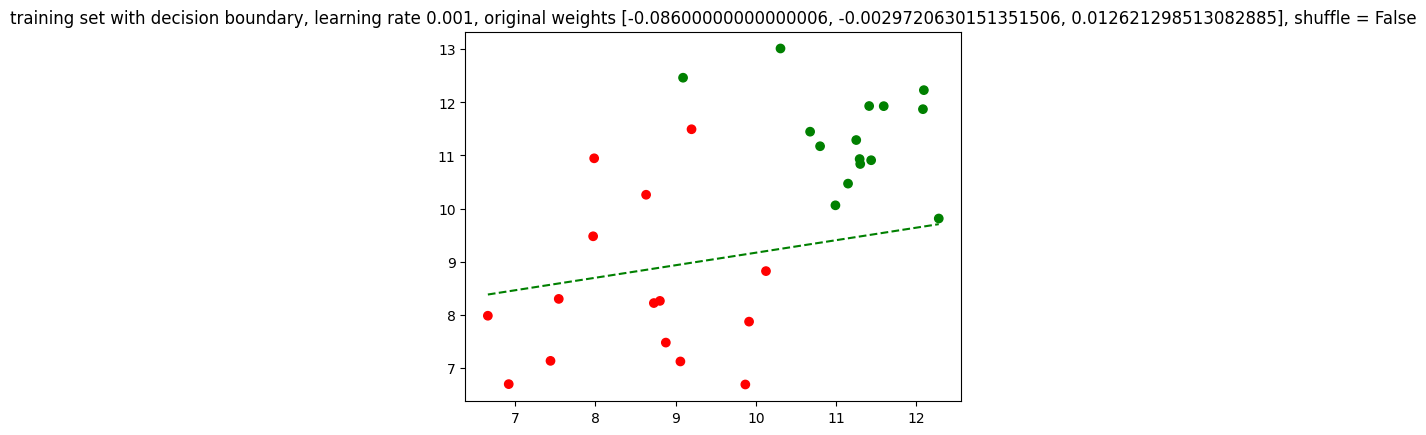

The weight vector misclassifies the following points on the test set [array([11.484, 10.652]), array([9.767, 11.185]), array([10.921, 11.217]), array([8.117, 10.221]), array([11.817, 11.743])]
the error rate on the test set is 5 or 50.0 %


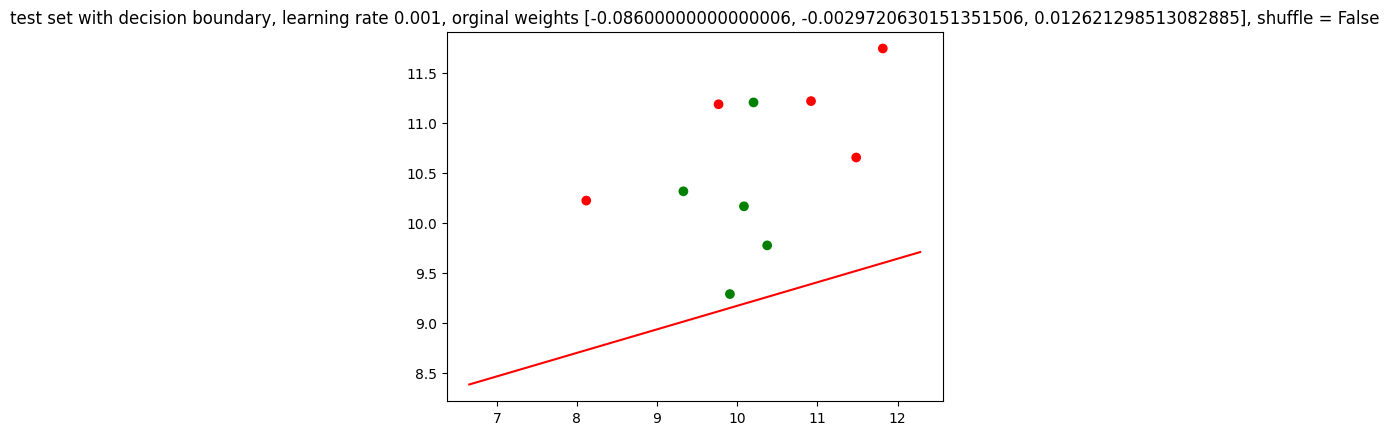

In [ ]:
"""Change the learning rate"""
weight_input = [0] * 3
learning_rate = 0.001
shuffle = False
iterations = 500

print(f"weight vector initialized to {weight_input}, learning_rate = {learning_rate}, shuffle = {shuffle}")
best_weight = pla(X_train_3D, y_train, weight_input, learning_rate, shuffle, iterations)

print(" ")
visualize_data(best_weight, X_train, X_test, y_train, y_test, weight_input, learning_rate, shuffle)

# PLA Run -> W=0, learning_rate=0.1, shuffle = True, iterations = 5000

weight vector initialized to [0, 0, 0], learning_rate = 0.1, shuffle = True
the lowest error rate found in the training set is 1 or 3.3333333333333335 %
this solution was found on the 178 epoch
and the 26'th iteration of the inner for loop
The weight vector was updated 4645 times
The weight vector was updated to [-29.300000000000146, 1.5103312805836215, 1.5498117516917165]
 
The decision boundary misclassifies the following points of the training set [array([9.199, 11.494])]


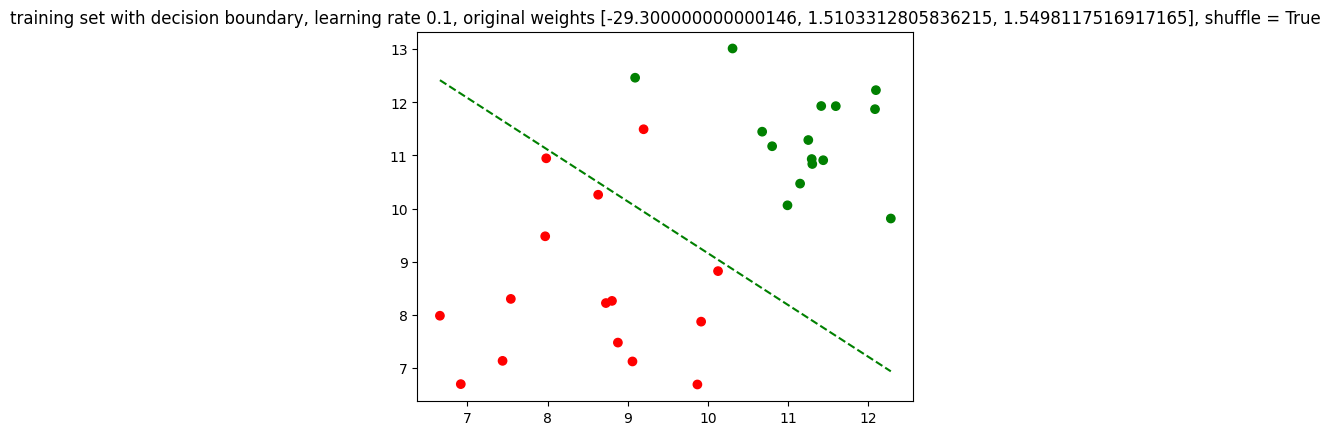

The weight vector misclassifies the following points on the test set [array([11.484, 10.652]), array([9.767, 11.185]), array([10.921, 11.217]), array([11.817, 11.743])]
the error rate on the test set is 4 or 40.0 %


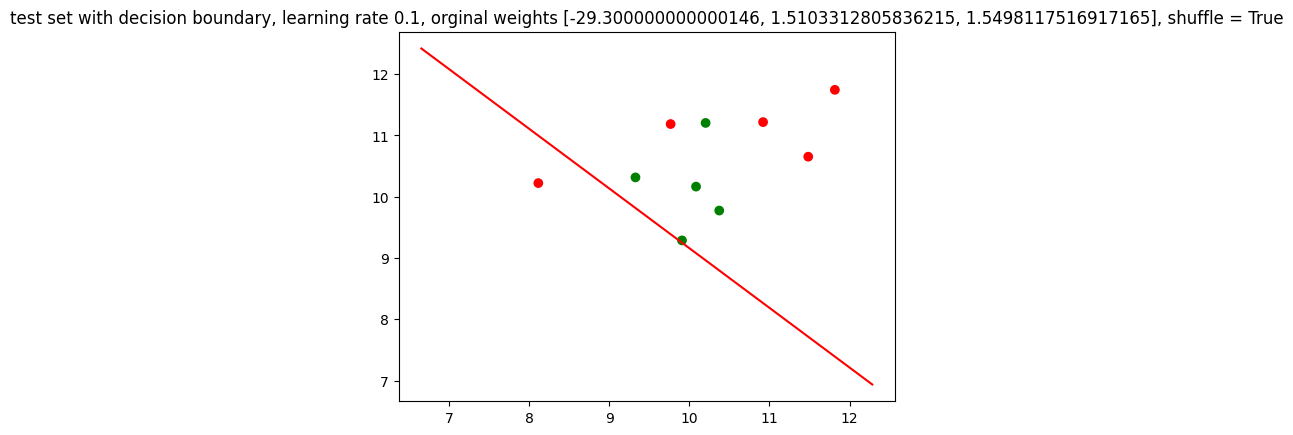

In [ ]:
"""Shuffle the order points are considered in"""
weight_input = [0] * 3
learning_rate = 0.1
shuffle = True
iterations = 500

print(f"weight vector initialized to {weight_input}, learning_rate = {learning_rate}, shuffle = {shuffle}")
best_weight = pla(X_train_3D, y_train, weight_input, learning_rate, shuffle, iterations)

print(" ")
visualize_data(best_weight, X_train, X_test, y_train, y_test, weight_input, learning_rate, shuffle)

## PLA Run -> W = 0, learning_rate 0.1, shuffle = False, iterations = 250

weight vector initialized to [0.0, 0.0, 0.0], learning_rate = 0.1, shuffle = False
the lowest error rate found in the training set is 2 or 6.666666666666667 %
this solution was found on the 185 epoch
and the 15'th iteration of the inner for loop
The weight vector was updated 604 times
 
The decision boundary misclassifies the following points of the training set [array([9.629, 7.160]), array([9.354, 6.910])]


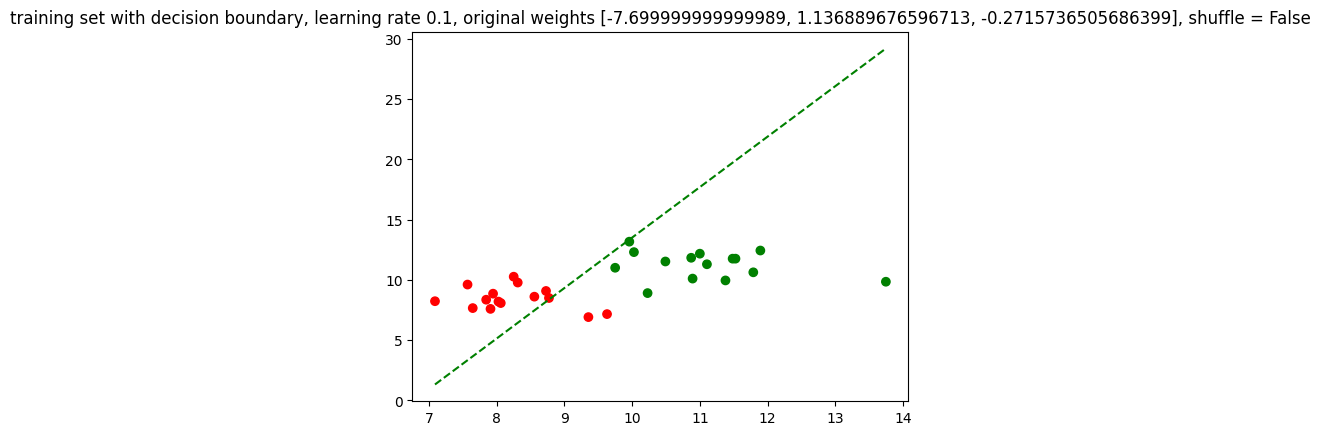

The weight vector misclassifies the following points on the test set [array([9.984, 9.152]), array([9.421, 9.717]), array([10.317, 10.243])]
the error rate on the test set is 3 or 30.0 %


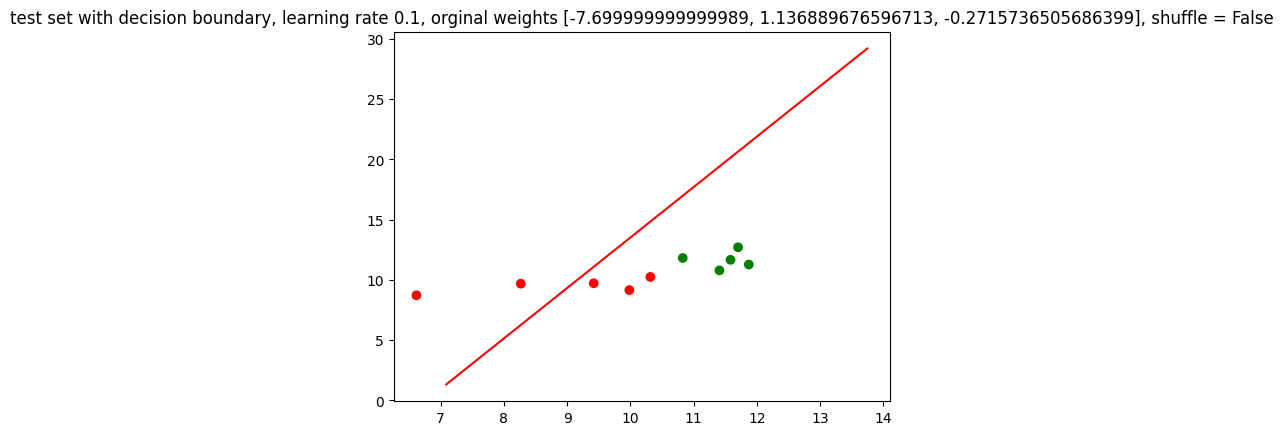

In [201]:
"""Shuffle the order points are considered in"""
weight_input = [0.0] * 3
learning_rate = 0.1
shuffle = False
iterations = 250

print(f"weight vector initialized to {weight_input}, learning_rate = {learning_rate}, shuffle = {shuffle}")
best_weight = pla(X_train_3D, y_train, weight_input, learning_rate, shuffle, iterations)

print(" ")
visualize_data(best_weight, X_train, X_test, y_train, y_test, weight_input, learning_rate, shuffle)